dataset beauty.csv / Kaggle

In [8]:
import pandas as pd
import numpy as np
import urllib.request as urq
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import OneClassSVM
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor

In [1]:
# Carregar os dados da série temporal
from google.colab import files
uploaded = files.upload()

Saving beauty.csv to beauty.csv


In [2]:
import pandas as pd
import io
df = pd.read_csv("beauty.csv")

In [4]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [3]:
df.describe


<bound method NDFrame.describe of        wage  exper  union  goodhlth  black  female  married  service  educ  \
0      5.73     30      0         1      0       1        1        1    14   
1      4.28     28      0         1      0       1        1        0    12   
2      7.96     35      0         1      0       1        0        0    10   
3     11.57     38      0         1      0       0        1        1    16   
4     11.42     27      0         1      0       0        1        0    16   
...     ...    ...    ...       ...    ...     ...      ...      ...   ...   
1255   1.61     25      0         1      1       1        0        1    12   
1256   1.68      4      0         1      0       1        1        1    12   
1257   3.29     35      0         1      1       1        0        1    12   
1258   2.31     15      0         1      1       1        1        1    10   
1259   1.92     24      0         0      0       1        0        1    16   

      looks  
0         4  
1

In [6]:
print(df.isnull().sum())

wage        0
exper       0
union       0
goodhlth    0
black       0
female      0
married     0
service     0
educ        0
looks       0
dtype: int64


<Axes: >

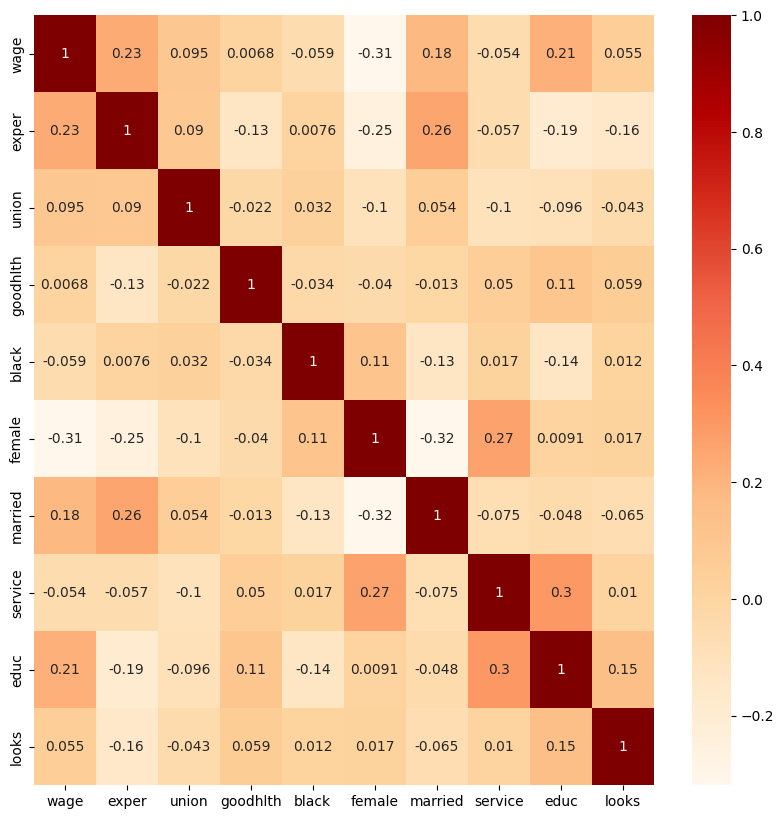

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='OrRd')

In [11]:
df['exper'].unique()

array([30, 28, 35, 38, 27, 20, 12,  5,  3,  6, 19,  8, 17,  7, 10, 33, 32,
       24, 29, 41, 40, 43, 18, 37, 31,  9, 42, 14,  4, 13, 23, 16, 26, 15,
       11, 25,  1, 36, 21, 22, 34, 44,  2, 39, 48, 45,  0, 47, 46])

(array([133., 227., 228., 170., 103., 121.,  85.,  93.,  73.,  27.]),
 array([ 0. ,  4.8,  9.6, 14.4, 19.2, 24. , 28.8, 33.6, 38.4, 43.2, 48. ]),
 <BarContainer object of 10 artists>)

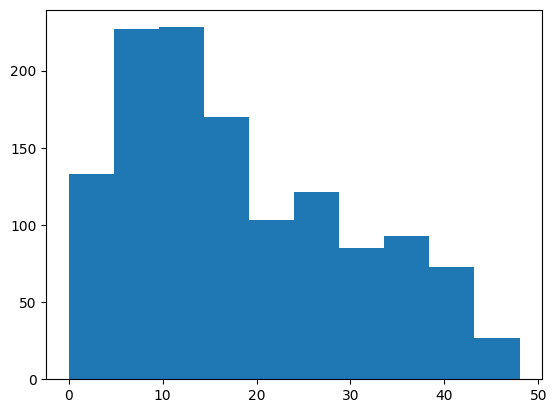

In [22]:
plt.hist(df['exper'])

In [23]:
#Ajuste da base de dados
#Na detecção de novidades usando Python, -1 deve ser a classe negativa (outlier) e +1 deve ser positiva
#y: classes das instâncias x: instâncias
y = df['exper'].copy()
for i in range(len(y)):
    if (y[i] == 1):
        y[i] = -1
    else:
        y[i] = 1

In [24]:
# Removendo coluna exper
x = df.drop(labels = ['exper'], axis = 1)

In [27]:
# scatter plot
pos_out = y[y == -1].index
pos_in = y[y == 1].index


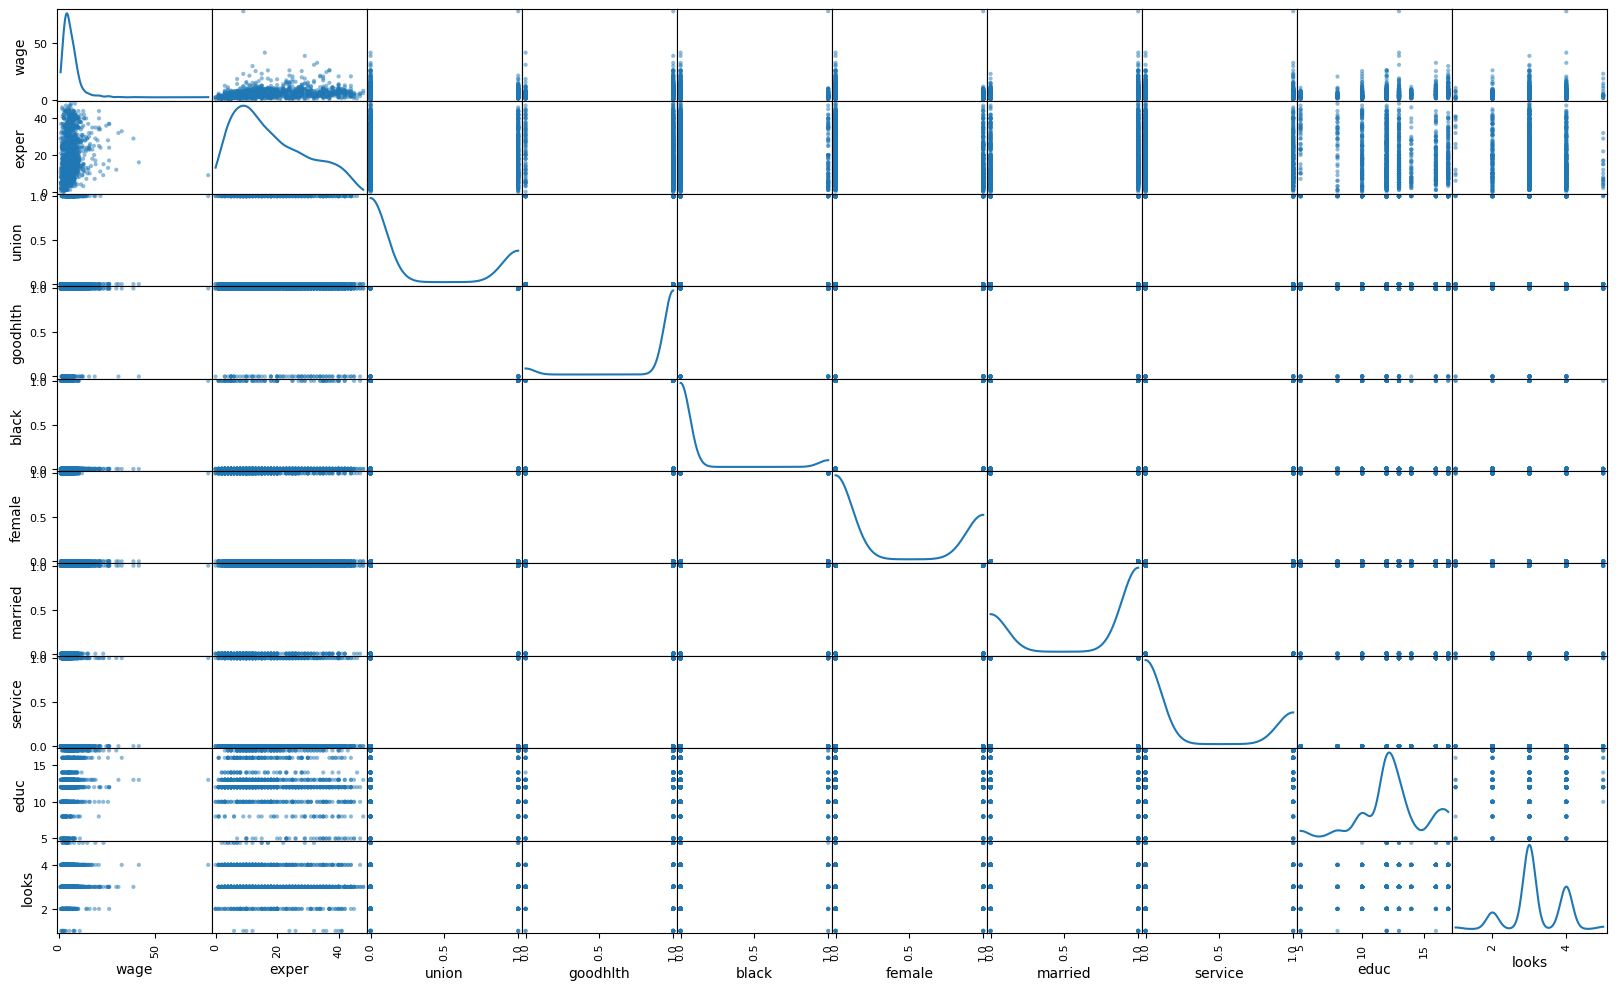

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset usando o Pandas
df = pd.read_csv("beauty.csv")

# Criar o Scatter plot para todos os pares possíveis de atributos
pd.plotting.scatter_matrix(df, figsize=(20, 12), diagonal='kde')

plt.show()


In [33]:
# Dividir o conjunto de dados em 70% / 30% teste.
#Para o treinamento de classificadores,utilizaremos os exemplos de classe positiva (não outlier)
#os outliers serão utilizados para o teste do modelo

x_outlier = x.drop(index = pos_in)

y_outlier = y.drop(index = pos_in)

x = x.drop(index = pos_out)

y = y.drop(index = pos_out)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30, random_state=123, shuffle=True)

y_teste = pd.concat([y_teste, y_outlier])

x_teste = pd.concat([x_teste, x_outlier])

y_treino = pd.concat([y_treino, y_outlier])

x_treino = pd.concat([x_treino, x_outlier])

In [37]:
#Pipeline com classificador utilizando uma abordagem RF
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Pré-processamento para padronização dos dados
    ('RF', RandomForestClassifier())  # Utilização do classificador Random Forest
])

In [38]:
pipeline.fit(x_treino, y_treino)

Pipeline(steps=[('scaler', StandardScaler()), ('RF', RandomForestClassifier())])

In [39]:
res = pipeline.predict(x_teste)

In [40]:
#Matriz de confusão conforme a função 'confusion_matrix'
#∣∣∣VNFNFPVP∣∣∣

#VP: verdadeiros positivos
#FN: falsos negativos
#VN: verdadeiros negativos
#FP: falsos positivos
mat = confusion_matrix(y_teste, res)
mat

array([[  25,    0],
       [   1, 1607]])

In [41]:
vn, fp, fn, vp = mat.ravel()

In [42]:
accuracy_score(y_teste, res)

0.9993876301285977

In [43]:
(vp + vn) / (vp + vn + fn + fp)

0.9993876301285977

In [ ]:
#Valor preditivo positivo (VPP ou precisão) VPP=VPVP+FP

In [44]:
vp / (vp + fp)

1.0

In [45]:
#Sensitividade (Sen)Sen=VPVP+FN
vp / (vp + fn)

0.9993781094527363

In [46]:
#Valor preditivo negativo (VPN) VPN=VNVN+FN
vn

25

In [47]:
fn

1

In [48]:
vn / (vn + fn)

0.9615384615384616

In [49]:
#Specificidade (Esp) Esp=VNVN+FP
vn / (vn + fp)

1.0